In [3]:
def ddmm_mmmm_to_decimal(coord):
    # Assuming coord is in the format 'ddmm.mmmm'
    
    # Extract degrees and decimal minutes
    degrees = int(coord[:-8])
    decimal_minutes = float(coord[-8:])
    
    # Convert decimal minutes to decimal degrees
    decimal_degrees = degrees + decimal_minutes / 60
    
    return decimal_degrees

In [55]:
import csv 
import pandas as pd

# convert to array
with open('../E-Jeep Data/data_2023-11-09.csv', 'r', encoding='utf-8') as csv_file:
    csv_reader = csv.reader(csv_file)
    data = list(csv_reader)
    
# remove header
# header = data[0]
data[0][2] = '1438.41261'
data[0][3] = '12104.71318'
data[0][4] = '60'

# convert to float and breakdown time data
for i in range(len(data)):
    data[i][2] = ddmm_mmmm_to_decimal(data[i][2]) if len(data[i][2])>3 else data[i-1][2]
    data[i][3] = ddmm_mmmm_to_decimal(data[i][3]) if len(data[i][3])>3 else data[i-1][3]
    data[i][4] = float(data[i][4]) if data[i][4] != '' else data[i-1][4]
    print(data[i])
    
    # print(data[i]+data[i][1].replace('/', ' ').replace(':', ' ').replace('-', ' ').replace('.', ' ').split())
    
    # hack to get individual time data
    # timelog = [int(x) for x in data[i][1].replace('/', ' ').replace(':', ' ').replace('-', ' ').replace('.', ' ').split()]
    # data[i] += timelog

header = ['Type', 'Timestamp', 'Longitude', 'Latitude', 'Altitude', 'Humidity', 'Temperature']   

# convert to dataframe
df = pd.DataFrame(data, columns=header)
# convert df['Altitude'] to float
# accept empty string ''
df['Altitude'] = pd.to_numeric(df['Altitude'], errors='coerce')
df

['$GPGGA', '21:52:34.180000+00:00', 14.640210166666666, 121.078553, 60.0, '83.9000015258789', '28.299999237060547']
['$GPGGA', '21:52:35+00:00', 14.640210166666666, 121.078553, 60.0, '73.69999694824219', '30.399999618530273']
['$GPGGA', '21:52:36+00:00', 14.640210166666666, 121.078553, 60.0, '73.69999694824219', '30.399999618530273']
['$GPGGA', '21:52:37+00:00', 14.640210166666666, 121.078553, 60.0, '73.69999694824219', '30.399999618530273']
['$GPGGA', '21:52:38+00:00', 14.640210166666666, 121.078553, 60.0, '73.69999694824219', '30.399999618530273']
['$GPGGA', '21:52:39+00:00', 14.640210166666666, 121.078553, 60.0, '73.69999694824219', '30.399999618530273']
['$GPGGA', '21:52:40+00:00', 14.640210166666666, 121.078553, 60.0, '73.5999984741211', '30.399999618530273']
['$GPGGA', '21:52:41+00:00', 14.640210166666666, 121.078553, 60.0, '73.5999984741211', '30.399999618530273']
['$GPGGA', '21:52:42+00:00', 14.640210166666666, 121.078553, 60.0, '73.5999984741211', '30.399999618530273']
['$GPGG

Type              Timestamp  Longitude    Latitude  Altitude  \
0      $GPGGA  21:52:34.180000+00:00  14.640210  121.078553      60.0   
1      $GPGGA         21:52:35+00:00  14.640210  121.078553      60.0   
2      $GPGGA         21:52:36+00:00  14.640210  121.078553      60.0   
3      $GPGGA         21:52:37+00:00  14.640210  121.078553      60.0   
4      $GPGGA         21:52:38+00:00  14.640210  121.078553      60.0   
...       ...                    ...        ...         ...       ...   
45855  $GPGGA         10:39:15+00:00  14.633553  121.075255      69.7   
45856  $GPGGA         10:39:16+00:00  14.633553  121.075255      69.7   
45857  $GPGGA         10:39:17+00:00  14.633553  121.075255      69.7   
45858  $GPGGA         10:39:18+00:00  14.633553  121.075255      69.7   
45859  $GPGGA         10:39:19+00:00  14.633553  121.075255      69.7   

                Humidity         Temperature  
0       83.9000015258789  28.299999237060547  
1      73.69999694824219  30.399999618530273  
2      73.69999694824219  30.399999618530273  
3      73.69999694824219  30.399999618530273  
4      73.69999694824219  30.399999618530273  
...                  ...                 ...  
45855  3304.199951171875                15.5  
45856  3304.199951171875                15.5  
45857  3304.199951171875                15.5  
45858  3304.199951171875                15.5  
45859  3304.199951171875                15.5  

[45860 rows x 7 columns]

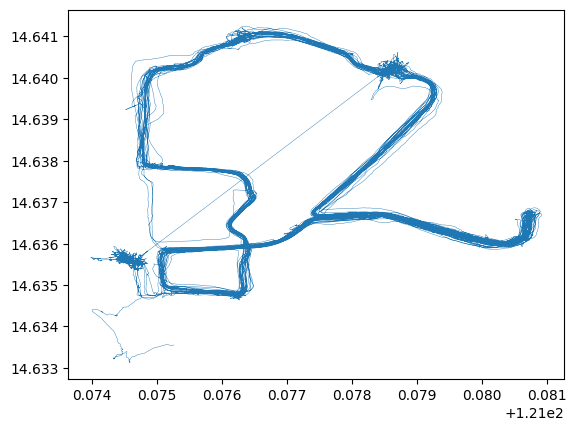

In [56]:
# Plot 2d array of latitude and longitude on a map
import matplotlib.pyplot as plt

# plot
plt.plot(df['Latitude'], df['Longitude'], linewidth=0.3)
plt.show()

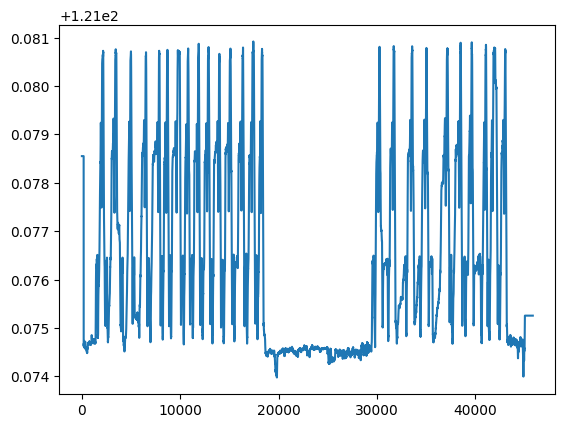

In [57]:
plt.plot(df['Latitude'])
plt.show()

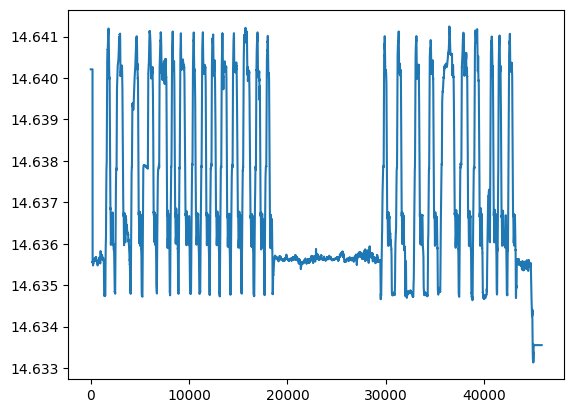

In [58]:
plt.plot(df['Longitude'])
plt.show()

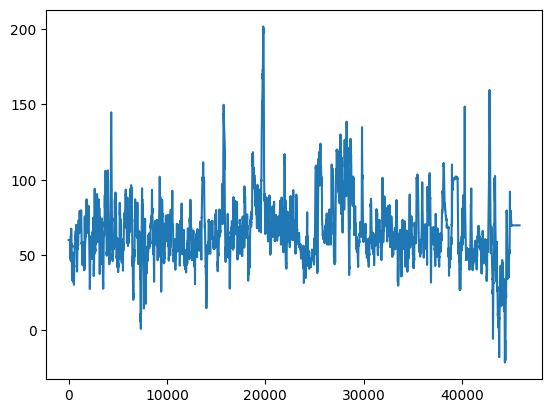

In [59]:
plt.plot(df['Altitude'])
plt.show()